# Morts du Covid

## Sources authentiques de données

- COVID Data : https://epistat.wiv-isp.be/covid/
- COVID Mortality - JSON Data : https://epistat.sciensano.be/Data/COVID19BE_MORT.json
- COVID Mortality - CSV Data :https://epistat.sciensano.be/Data/COVID19BE_MORT.csv

## Suggestions d'exercices

- Créer un graphique qui contient deux courbes de mortalité en fonction du sexe.
- Créer une fonction qui renvoie le nombre de morts pour une semaine donnée et dont la signature est `def get_death_number_for_week(week: int, year: int, data: list) -> int`
- Réaliser un graphique qui affiche le nombre de morts par semaine en 2020.

## Importer l'ensemble des données

In [1]:
### Importer les librairies nécessaires pour ce notebook
import calendar
import csv
import datetime
import json
from pprint import pprint

import numpy as np
import requests
from matplotlib import pyplot as plt

In [2]:
ORIGIN = "LIVE"

if ORIGIN == "LIVE":
    ### Charger les données à partir du web service JSON
    death_records_response = requests.get("https://epistat.sciensano.be/Data/COVID19BE_MORT.json")
    death_records = death_records_response.json()
elif ORIGIN == "JSON":
    ### (Alternative) Charger les données à partir du fichier JSON
    f = open("matplotlib-covid.json", "r")
    death_records = json.load(f)
    f.close()
elif ORIGIN == "CSV":
    ### (Alternative) Charger les données à partir du fichier CSV
    f = open("matplotlib-covid.csv", "r")
    death_records = [row for row in csv.DictReader(f)]
    f.close()

    #### Convertir le champ string *DEATHS* en int
    for record in death_records:
        record["DEATHS"] = int(record["DEATHS"])
else:
    death_records = []

In [3]:
### Imprimer les 5 derniers records
pprint(death_records[-5:])

[{'AGEGROUP': '85+',
  'DATE': '2021-12-28',
  'DEATHS': 1,
  'REGION': 'Wallonia',
  'SEX': 'F'},
 {'AGEGROUP': '45-64',
  'DATE': '2021-12-29',
  'DEATHS': 1,
  'REGION': 'Flanders',
  'SEX': 'M'},
 {'AGEGROUP': '65-74',
  'DATE': '2021-12-29',
  'DEATHS': 1,
  'REGION': 'Flanders',
  'SEX': 'M'},
 {'AGEGROUP': '75-84',
  'DATE': '2021-12-29',
  'DEATHS': 1,
  'REGION': 'Brussels',
  'SEX': 'M'},
 {'AGEGROUP': '65-74',
  'DATE': '2021-12-29',
  'DEATHS': 1,
  'REGION': 'Wallonia',
  'SEX': 'F'}]


## Calculer le nombre total de morts

In [4]:
dead_number = sum([record["DEATHS"] for record in death_records])
print(f"Nombre total de morts : {dead_number}")

Nombre total de morts : 28267


## Calculer le nombre de morts du 15 janvier 2021

In [5]:
### Sélectionner les données du 15 janvier 2021
dead_2021_01_15 = [record for record in death_records if record["DATE"] == "2021-01-15"]
# pprint(dead_2021_01_15)

In [6]:
### Calculer le nombre de morts le 15 janvier 2021
dead_2021_01_15_sum = sum([item["DEATHS"] for item in dead_2021_01_15])
print(f"Le nombre de morts du Covid le 15 janvier 2021 est égal à {dead_2021_01_15_sum}.")

Le nombre de morts du Covid le 15 janvier 2021 est égal à 48.


## Créer une fonction qui renvoie le nombre de mort pour un jour donné 

In [7]:
def get_death_number_for_day(day: str, data: dict) -> int:
    deaths = sum([record["DEATHS"] for record in data if record.get("DATE") == day])
    return deaths

In [8]:
deaths_2020_12_25 = get_death_number_for_day("2020-12-25", death_records)
print(f"Nombre de mort le jour de Noël : {deaths_2020_12_25}")

Nombre de mort le jour de Noël : 67


## Créer une fonction qui renvoie le nombre de morts pour un jour et une région données

In [9]:
def get_death_number_for_day_and_region(day: str, region: str, data: list) -> int:
    deaths = sum([record["DEATHS"] for record in data if record.get("REGION") == region and record.get("DATE") == day])
    return deaths


death_in_wallonia_2021_01_01 = get_death_number_for_day_and_region("2021-01-01", "Wallonia", death_records)
print(f"Nombre de morts en Wallonie le 1er janvier : {death_in_wallonia_2021_01_01}")

Nombre de morts en Wallonie le 1er janvier : 16


## Afficher un graphique du nombre de morts par jour du mois de janvier 2021

In [10]:
### Construire les jours du mois de janvier 2021
january_days = ["2021-01-" + f"{day:02}" for day in range(1, 32)]
# pprint(january_days)

In [11]:
### Mettre les valeurs initiales de morts par jour du mois de janvier à zéro.
january_deads = dict.fromkeys(january_days, 0)
# pprint(january_deads)

In [12]:
### Calculer le nombre de morts par jour du mois de janvier 2021
for record in death_records:
    rday = record["DATE"]
    if rday.startswith("2021-01-"):
        january_deads[rday] += record["DEATHS"]
# pprint(january_deads)

Text(0, 0.5, 'Morts')

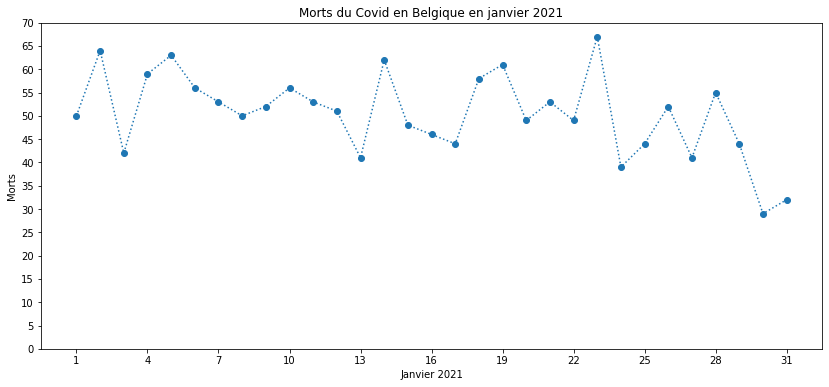

In [13]:
### Afficher un graphique du nombre de morts par jour pour le mois de janvier 2021
x = [int(day[-2:]) for day in january_deads.keys()]
y = january_deads.values()
plt.figure(figsize=(14, 6))
plt.plot(x, y, marker="o", linestyle="dotted")

plt.title("Morts du Covid en Belgique en janvier 2021")
plt.xlabel("Janvier 2021")
plt.xticks(range(1, 32, 3))
plt.yticks(range(0, 71, 5))
plt.ylabel("Morts")

## Créer une fonction qui renvoie le nombre de morts par semaine pour une année donnée

In [14]:
def get_deaths_per_week_for_year(year: int, data: list) -> dict:
    # Initialise à 0 le nombre de morts pour les 52 semaines de l'année
    deaths_per_week = dict.fromkeys(range(1, 54), 0)
    for record in data:
        record_iso_date = record["DATE"]
        record_date = datetime.date.fromisoformat(record_iso_date)
        if record_date.year == year:
            record_week = record_date.isocalendar()[1]
            deaths_per_week[record_week] += record["DEATHS"]
    return deaths_per_week

In [15]:
deaths_per_week_for_2020 = get_deaths_per_week_for_year(2020, death_records)
# pprint(deaths_per_week_for_2020)

### Afficher un graphique du nombre de morts par semaine pour l'année 2020

Text(0, 0.5, 'Morts')

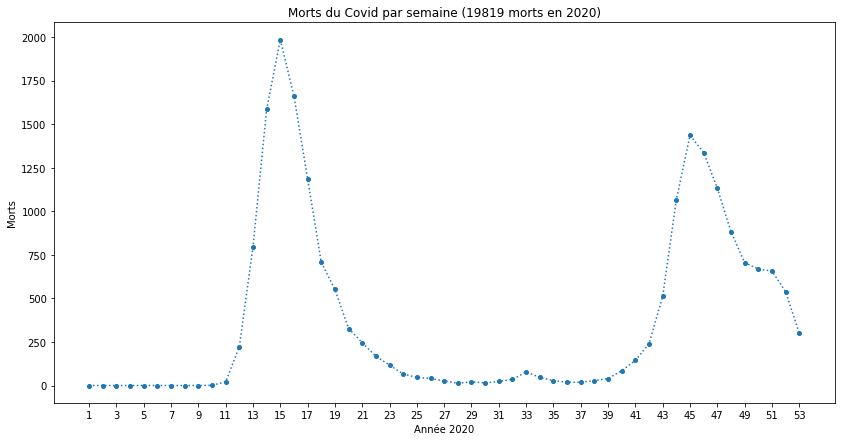

In [16]:
x = deaths_per_week_for_2020.keys()
y = deaths_per_week_for_2020.values()
total_deaths_in_2020 = sum(y)

plt.figure(figsize=(14, 7))
plt.plot(x, y, marker="o", markersize=4, linestyle="dotted")

plt.title(f"Morts du Covid par semaine ({total_deaths_in_2020} morts en 2020)")
plt.xlabel("Année 2020")
plt.xticks(range(1, 54, 2))
# plt.yticks(range(0, 71, 5))
plt.ylabel("Morts")

## Créer une fonction qui retourne le nombre de décès par tranche d'âge pour un mois donné

In [17]:
def get_death_number_by_age_for_month(month: int, year: int, data: list) -> dict:
    month_str = f"{year}-{month:02}"
    deaths_by_age = dict.fromkeys(["0-24", "25-44", "45-64", "65-74", "75-84", "85+", "OTHERS"], 0)
    for record in data:
        if record["DATE"].startswith(month_str):
            record_deaths = record.get("DEATHS", 0)
            record_agegroup = record.get("AGEGROUP", None)
            if record_agegroup in deaths_by_age:
                deaths_by_age[record_agegroup] += record_deaths
            else:
                deaths_by_age["OTHERS"] += record_deaths
    return deaths_by_age


deaths_in_2020_12 = get_death_number_by_age_for_month(12, 2020, death_records)
deaths_in_2021_01 = get_death_number_by_age_for_month(1, 2021, death_records)

print(f"Morts par âge en décembre 2020 : {deaths_in_2020_12}")
print(f"Morts par âge en janvier 2021 : {deaths_in_2021_01}")

Morts par âge en décembre 2020 : {'0-24': 2, '25-44': 12, '45-64': 153, '65-74': 341, '75-84': 740, '85+': 1517, 'OTHERS': 2}
Morts par âge en janvier 2021 : {'0-24': 0, '25-44': 11, '45-64': 75, '65-74': 169, '75-84': 447, '85+': 859, 'OTHERS': 2}


## Afficher les diagrammes circulaires des proportions de décès par tranche d'âge

In [18]:
def display_death_number_by_age_for_year(year: int, death_records: list):
    plt.figure(figsize=(16, 20))
    plt.suptitle(f"Proportions de décès par tranche d'âge par mois pour l'année {year}")
    for month in range(1, 13):
        deaths_by_age = get_death_number_by_age_for_month(month, year, death_records)
        deaths = sum(deaths_by_age.values())
        # Supprimer les labels pour les sections de moins de 4%
        labels = [k if v > deaths / 25 else "" for k, v in deaths_by_age.items()]
        numbers = deaths_by_age.values()
        if deaths > 0:
            plt.subplot(4, 3, month)
            plt.title(f"{calendar.month_name[month]} {year} : {deaths} morts")
            plt.pie(
                numbers,
                labels=labels,
                # Supprimer l'affichage du pourcentage pour les sections de moins de 4%
                autopct=lambda pct: f"{pct:.0f}%" if pct > 4 else "",
                startangle=90,
                counterclock=False,
            )

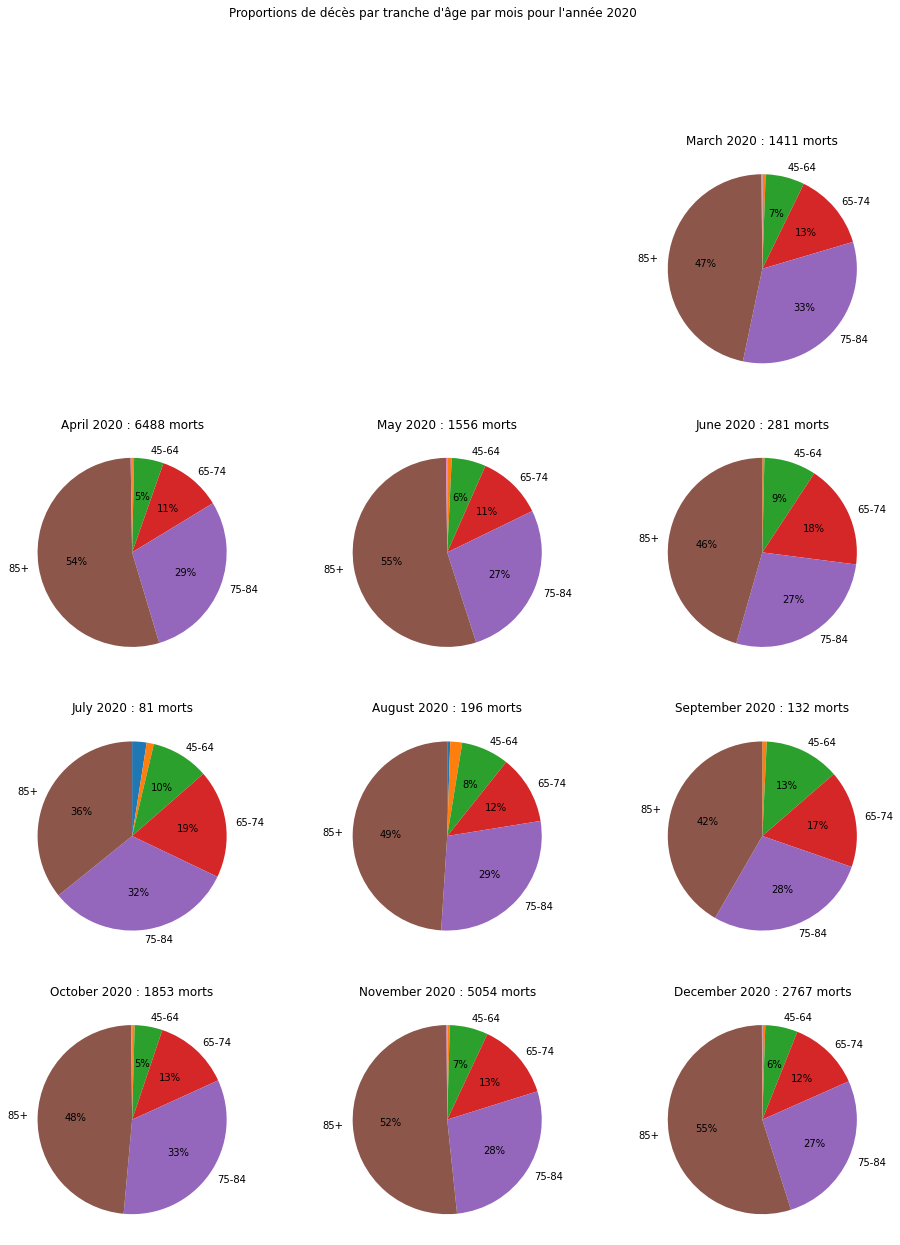

In [19]:
display_death_number_by_age_for_year(year=2020, death_records=death_records)

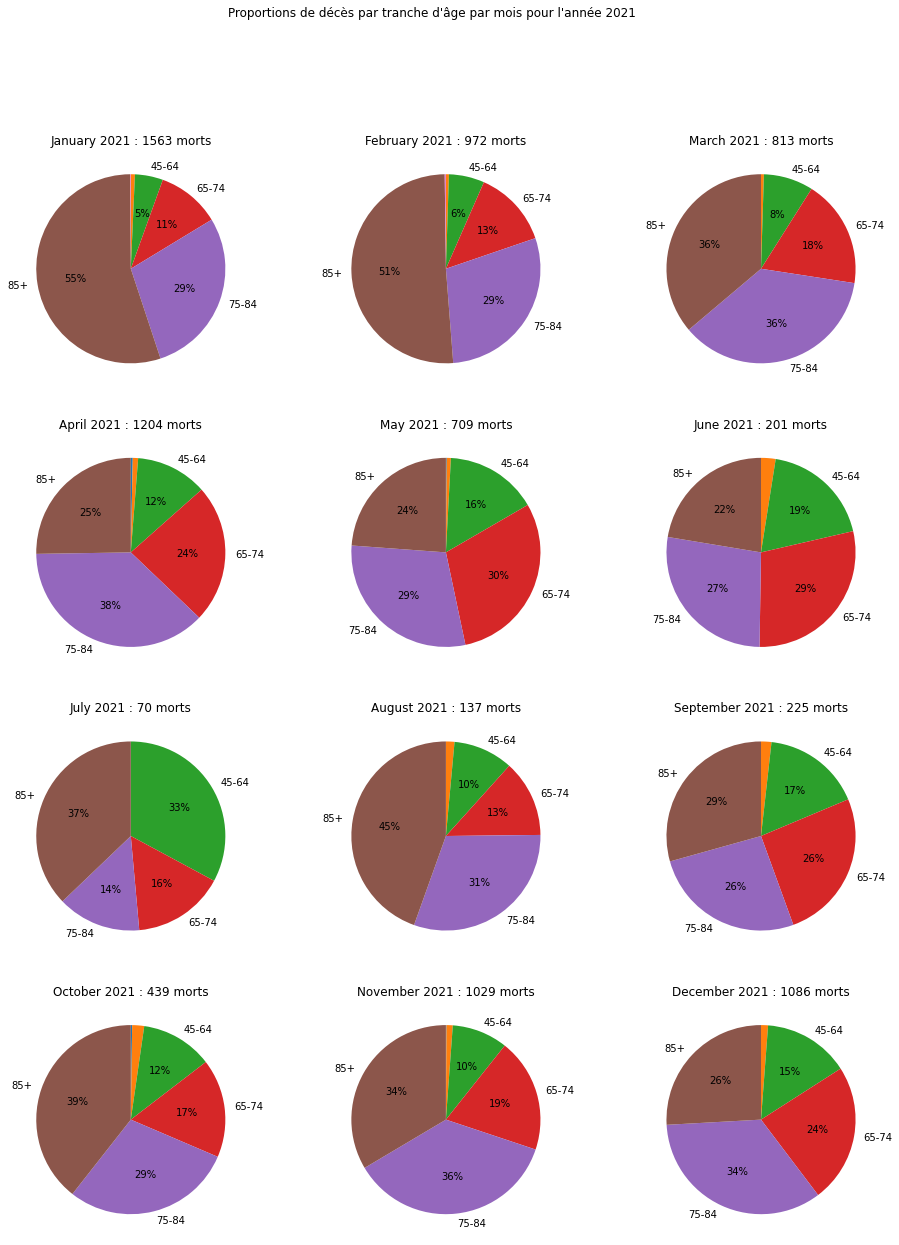

In [20]:
display_death_number_by_age_for_year(year=2021, death_records=death_records)

## A bar chart of 0-24, 25-44 deaths

In [21]:
def get_death_number_by_month_for_age_and_year(age: str, year: str, data: list) -> dict:
    keys = [f"{month:02}" for month in range(1, 13)]
    deaths_by_month = dict.fromkeys(keys, 0)
    for record in data:
        record_year = record["DATE"][:4]
        record_month = record["DATE"][5:7]
        record_agegroup = record.get("AGEGROUP")
        if record_year == year and record_agegroup == age:
            deaths_by_month[record_month] += record["DEATHS"]
    return deaths_by_month


# age in ["0-24", "25-44", "45-64", "65-74", "75-84", "85+"]

deaths_0_24_2020 = get_death_number_by_month_for_age_and_year("0-24", "2020", death_records)
deaths_0_24_2021 = get_death_number_by_month_for_age_and_year("0-24", "2021", death_records)

pprint(f"Morts 0-24 par mois en 2020: {deaths_0_24_2020}")
pprint(f"Morts 0-24 par mois en 2021 : {deaths_0_24_2021}")

("Morts 0-24 par mois en 2020: {'01': 0, '02': 0, '03': 1, '04': 0, '05': 0, "
 "'06': 0, '07': 2, '08': 1, '09': 0, '10': 0, '11': 2, '12': 2}")
("Morts 0-24 par mois en 2021 : {'01': 0, '02': 0, '03': 0, '04': 4, '05': 1, "
 "'06': 0, '07': 0, '08': 0, '09': 0, '10': 1, '11': 1, '12': 0}")


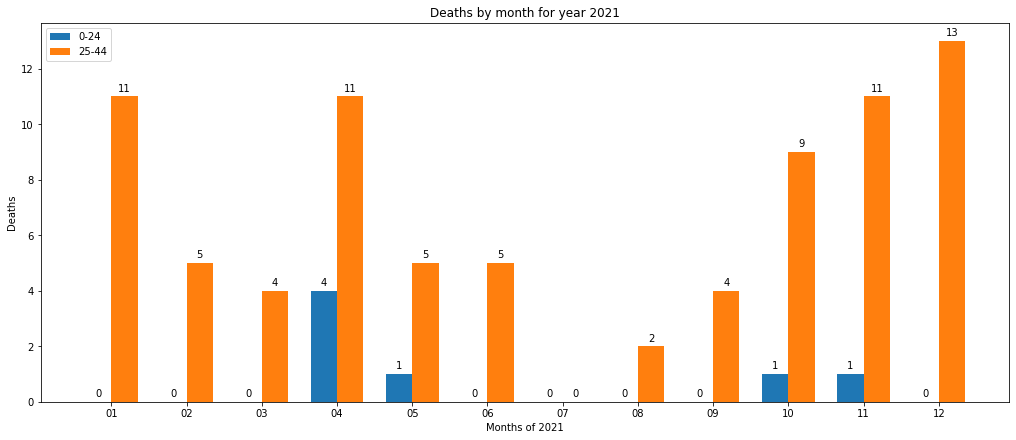

In [22]:
YEAR = "2021"
labels = [f"{month:02}" for month in range(1, 13)]
deaths_0_24_2020 = get_death_number_by_month_for_age_and_year("0-24", YEAR, death_records).values()
deaths_0_24_2021 = get_death_number_by_month_for_age_and_year("25-44", YEAR, death_records).values()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 6), layout="constrained")
rects1 = ax.bar(x - width / 2, deaths_0_24_2020, width, label="0-24")
rects2 = ax.bar(x + width / 2, deaths_0_24_2021, width, label="25-44")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel(f"Months of {YEAR}")
ax.set_ylabel("Deaths")
ax.set_title(f"Deaths by month for year {YEAR}")
ax.set_xticks(x, labels)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

ax.legend()

plt.show()